In [4]:
from astropy.io import fits

# open fits file as fits_file
fits_file = fits.open('mastDownload/HLA/hst_05369_h0_wfpc2_f606w_wf_01/hst_05369_h0_wfpc2_f606w_wf_01_drz.fits')
print(fits_file)

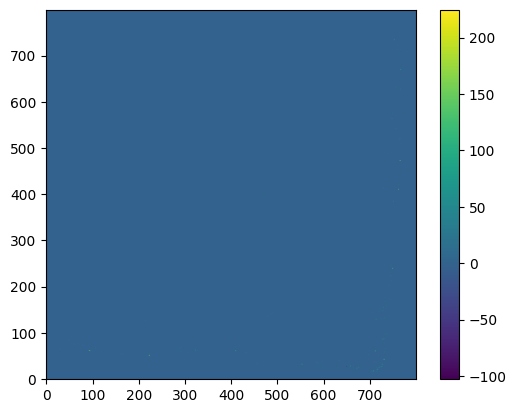

In [5]:
import matplotlib.pyplot as plt
image_data = fits_file[0].data
plt.figure()
plt.imshow(image_data, origin = 'lower')
plt.colorbar()
plt.show()

In [20]:
# add LogNorm and change cmap to 'Greys'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap='viridis', norm=LogNorm())
plt.colorbar()
plt.show()

TypeError: Invalid shape (3, 2400, 2400) for image data

In [17]:
# add LogNorm and change cmap to 'Greys'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap='Greys', norm=LogNorm())
plt.colorbar()
plt.show()

TypeError: Invalid shape (3, 2400, 2400) for image data

In [13]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
matplotlib.use('TkAgg')

# Fonction pour normaliser les données avec des limites de coupure
def normalize(data, min_percent=1, max_percent=99):
    min_val = np.percentile(data, min_percent)
    max_val = np.percentile(data, max_percent)
    data = np.clip(data, min_val, max_val)
    return (data - min_val) / (max_val - min_val)

# Ouvrir les fichiers FITS
fits_file1 = fits.open('Tarantula/Tarantula_Nebula-halpha.fit')
fits_file2 = fits.open('Tarantula/Tarantula_Nebula-oiii.fit')
fits_file3 = fits.open('Tarantula/Tarantula_Nebula-sii.fit')

# Extraire les données des images
image_data1 = fits_file1[0].data
image_data2 = fits_file2[0].data
image_data3 = fits_file3[0].data

# Fermer les fichiers FITS
fits_file1.close()
fits_file2.close()
fits_file3.close()

# Normaliser les données des images
image_data1 = normalize(image_data1)
image_data2 = normalize(image_data2)
image_data3 = normalize(image_data3)

# Combiner les images en une seule image RGB
# Création d'une image RGB
rgb_image = np.zeros((image_data1.shape[0], image_data1.shape[1], 3))
rgb_image[..., 0] = image_data1  # Canal rouge
rgb_image[..., 1] = image_data2  # Canal vert
rgb_image[..., 2] = image_data3  # Canal bleu

# Zoom sur la région d'intérêt (par exemple autour du centre)
zoom_x_min, zoom_x_max = 1200, 1800  # Ajustez ces valeurs
zoom_y_min, zoom_y_max = 1200, 1800  # Ajustez ces valeurs

# Afficher l'image RGB
plt.figure()
plt.imshow(rgb_image, origin = 'lower')
plt.colorbar()
plt.show()